In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
login =pd.read_csv('login.csv')

deliveries = pd.read_csv('deliveries.csv')

In [5]:
login.head()

,1,466,2017-01-07 18:24:07,Unnamed: 3
0,2,466,2017-01-07 18:24:55,NaN
1,3,458,2017-01-07 18:25:18,NaN
2,4,458,2017-01-07 18:26:21,NaN
3,5,592,2017-01-07 19:09:59,NaN
4,6,393,2017-01-08 00:41:19,NaN


In [7]:
deliveries.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [8]:
google = pd.read_csv('google.csv')

google.Date = pd.to_datetime(google.Date)
google.set_index('Date',inplace=True)

google['Month_name']=google.index.month_name()
google['Year']=google.index.year
google['Day']=google.index.day_name()
google['Quarter']=google.index.quarter

google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4471 entries, 2004-08-19 to 2022-05-20
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        4471 non-null   float64
 1   High        4471 non-null   float64
 2   Low         4471 non-null   float64
 3   Close       4471 non-null   float64
 4   Adj Close   4471 non-null   float64
 5   Volume      4471 non-null   int64  
 6   Month_name  4471 non-null   object 
 7   Year        4471 non-null   int32  
 8   Day         4471 non-null   object 
 9   Quarter     4471 non-null   int32  
dtypes: float64(5), int32(2), int64(1), object(2)
memory usage: 349.3+ KB


In [9]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,Month_name,Year,Day,Quarter
Date,,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,2004,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,2004,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,2004,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,2004,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,2004,Wednesday,3


In [14]:
a = pd.Timestamp('2023/1/1')
b = pd.Timestamp('2024/1/1')

In [15]:
pd.Timedelta(days=2,hours=10,minutes=50,seconds=30)

Timedelta('2 days 10:50:30')

In [16]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


In [17]:
deliveries.order_date = pd.to_datetime(deliveries.order_date)
deliveries.delivery_date = pd.to_datetime(deliveries.delivery_date)

deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


In [18]:
deliveries.head()

,order_date,delivery_date
0,1998-05-24,1999-02-05
1,1992-04-22,1998-03-06
2,1991-02-10,1992-08-26
3,1992-07-21,1997-11-20
4,1993-09-02,1998-06-10


In [19]:
deliveries['time_period'] = deliveries['delivery_date'] - deliveries['order_date']

In [20]:
deliveries.time_period.mean()

Timedelta('1217 days 22:53:53.532934128')

In [21]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,Month_name,Year,Day,Quarter
Date,,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,2004,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,2004,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,2004,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,2004,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,2004,Wednesday,3


<Axes: xlabel='Date'>

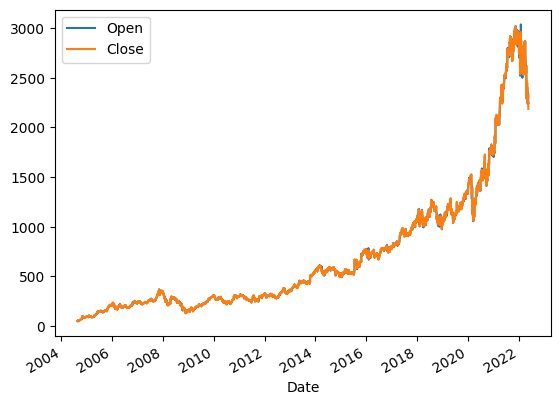

In [22]:
google.groupby('Date')[['Open','Close']].sum().plot(kind='line')

In [23]:
google.loc['2021-11-26']

Open          2900.310059
High          2905.939941
Low           2849.709961
Close         2856.120117
Adj Close     2856.120117
Volume             849600
Month_name       November
Year                 2021
Day                Friday
Quarter                 4
Name: 2021-11-26 00:00:00, dtype: object

In [24]:
google.loc['2021-11-26':'2022-01-06'][::-1]

,Open,High,Low,Close,Adj Close,Volume,Month_name,Year,Day,Quarter
Date,,,,,,,,,,
2022-01-06,2749.949951,2793.719971,2735.270020,2751.020020,2751.020020,1452500,January,2022,Thursday,1
2022-01-05,2883.620117,2885.959961,2750.469971,2753.070068,2753.070068,2482100,January,2022,Wednesday,1
2022-01-04,2911.010010,2932.199951,2876.322998,2888.330078,2888.330078,1146400,January,2022,Tuesday,1
2022-01-03,2889.510010,2911.000000,2870.050049,2901.489990,2901.489990,1260700,January,2022,Monday,1
2021-12-31,2910.879883,2927.300049,2893.550049,2893.590088,2893.590088,864900,December,2021,Friday,4
2021-12-30,2929.000000,2941.250000,2915.169922,2920.050049,2920.050049,648900,December,2021,Thursday,4
2021-12-29,2928.590088,2943.675049,2910.090088,2930.090088,2930.090088,851100,December,2021,Wednesday,4
2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200,December,2021,Tuesday,4
2021-12-27,2949.270020,2968.530029,2945.000000,2961.280029,2961.280029,662800,December,2021,Monday,4


In [25]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,Month_name,Year,Day,Quarter
Date,,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,2004,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,2004,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,2004,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,2004,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,2004,Wednesday,3


In [26]:
google[google.index.isin(pd.date_range(start='2005-01-06',end='2022-01-06',freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,Month_name,Year,Day,Quarter
Date,,,,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,2005,Thursday,1
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January,2006,Friday,1
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,2009,Tuesday,1
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,2010,Wednesday,1
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,2011,Thursday,1
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,2012,Friday,1
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January,2014,Monday,1
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January,2015,Tuesday,1
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January,2016,Wednesday,1


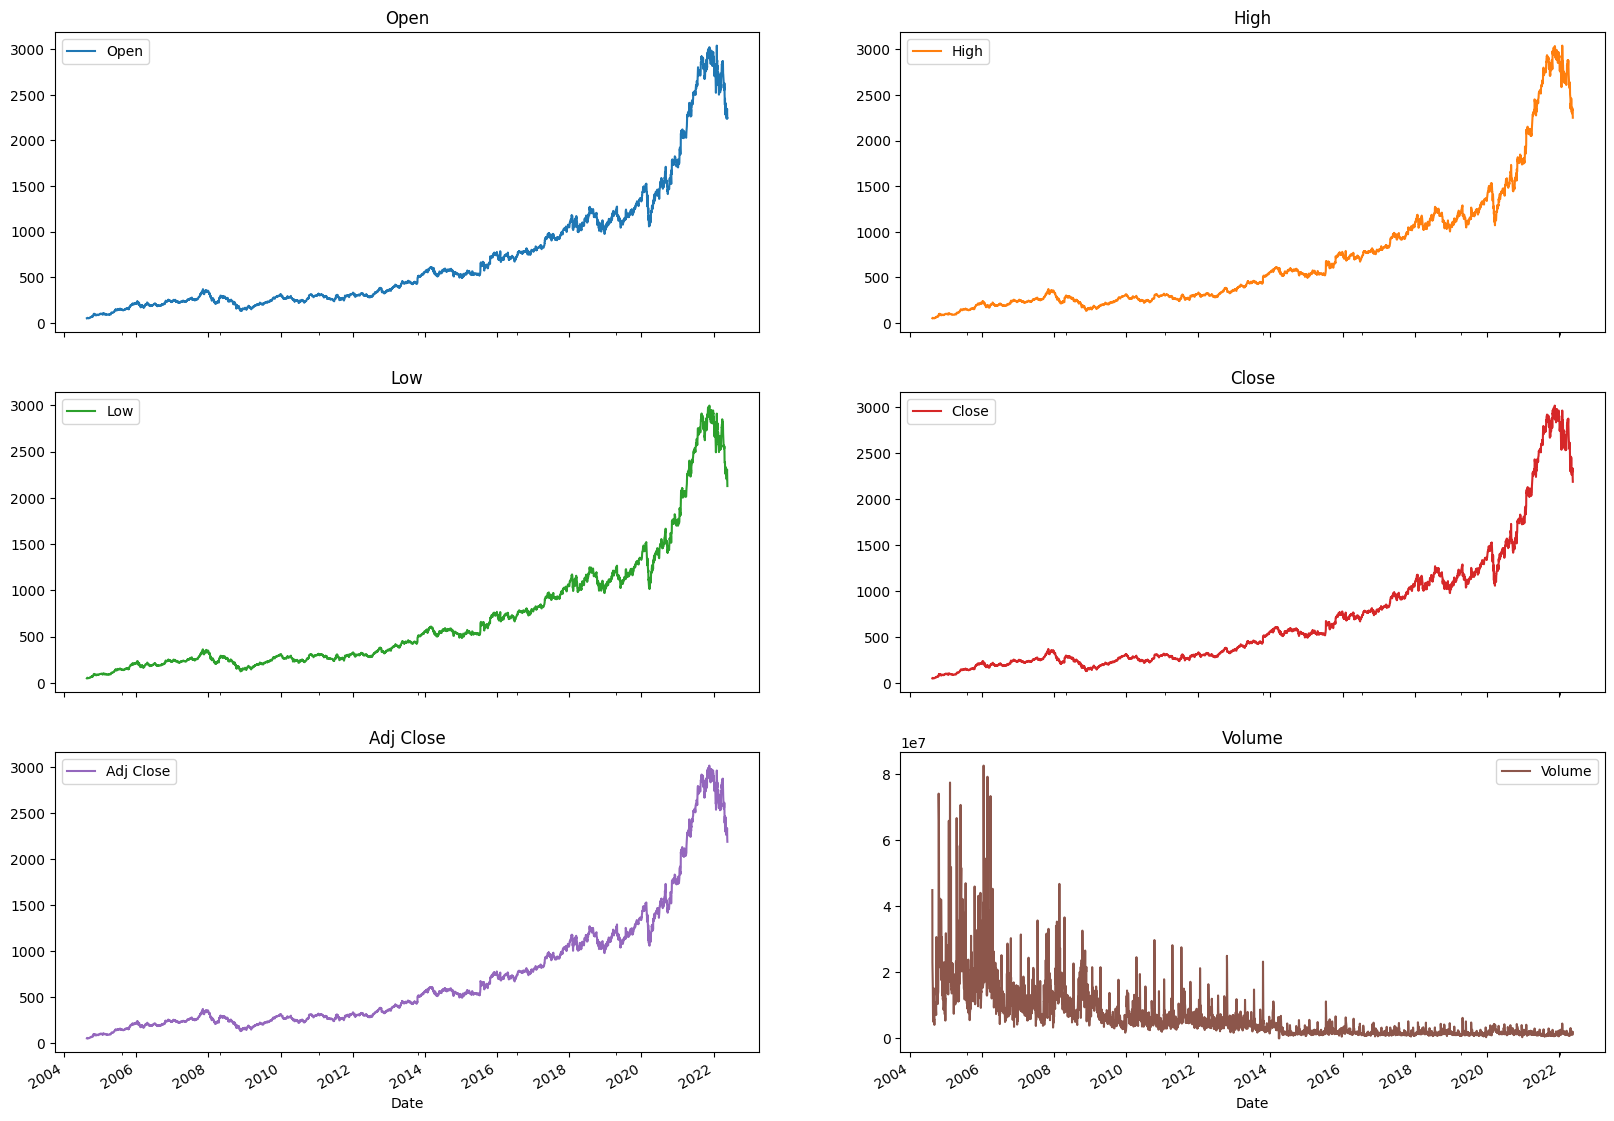

In [27]:
temp = google[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
ax = temp.plot(subplots=True,
                layout=(3,2),
               figsize=(20,15),
                title=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
                )

<Axes: xlabel='Date'>

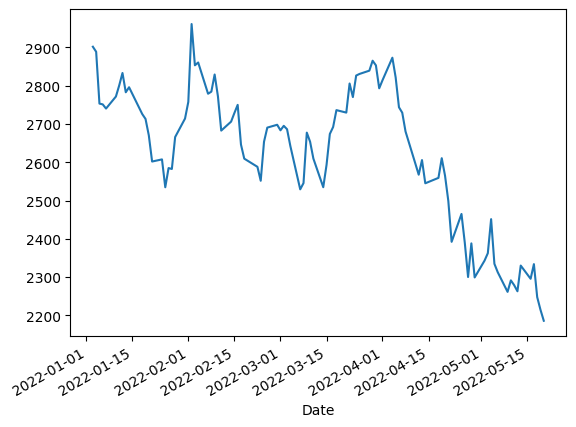

In [28]:
google.loc['2022']['Close'].plot()

<Axes: xlabel='Date'>

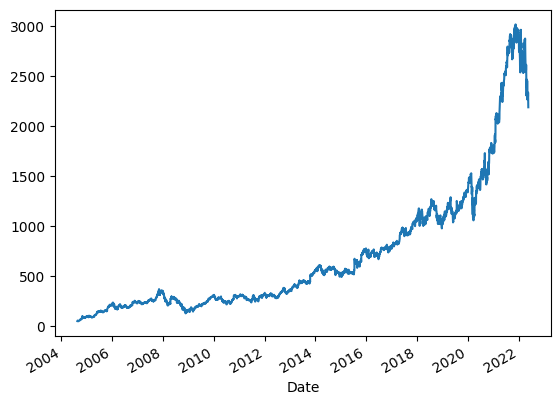

In [29]:
google['Close'].plot()

In [30]:
google.query('index >="2008"' and 'index <="2012"')

,Open,High,Low,Close,Adj Close,Volume,Month_name,Year,Day,Quarter
Date,,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,2004,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,2004,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,2004,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,2004,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,2004,Wednesday,3
2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620,August,2004,Thursday,3
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241307,August,2004,Friday,3
2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221498,August,2004,Monday,3
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252,August,2004,Tuesday,3


In [33]:
google.asfreq('D').shape

(6484, 10)

In [35]:
google.asfreq('QE').shape

(71, 10)

In [45]:
google.asfreq('YE').index.year.unique()

Index([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021],
      dtype='int32', name='Date')

In [43]:
google.index.year.unique()

Index([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int32', name='Date')

C:\Users\mohsi\AppData\Local\Temp\ipykernel_9800\1668545815.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  google['Close'].resample('Y').mean().plot()


<Axes: xlabel='Date'>

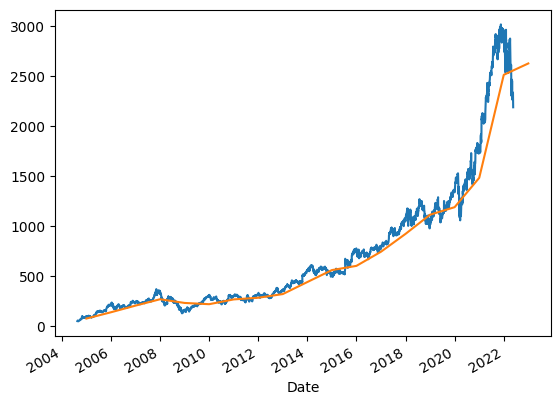

In [56]:
google['Close'].plot()
google['Close'].resample('Y').mean().plot()

C:\Users\mohsi\AppData\Local\Temp\ipykernel_9800\1335495586.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  google['Close'].resample('H').interpolate(method='linear').plot()


<Axes: xlabel='Date'>

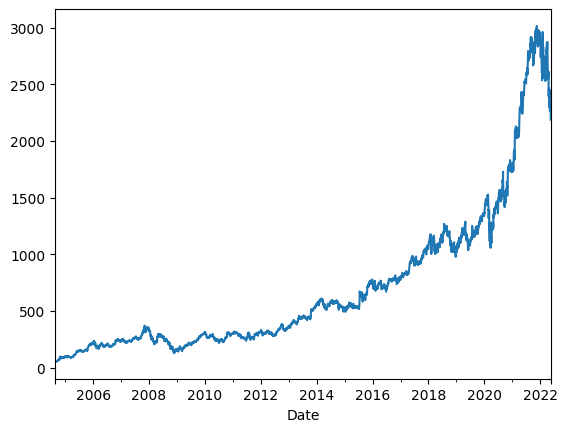

In [60]:
# google['Close'].plot()
google['Close'].resample('H').interpolate(method='linear').plot()

<Axes: xlabel='Date'>

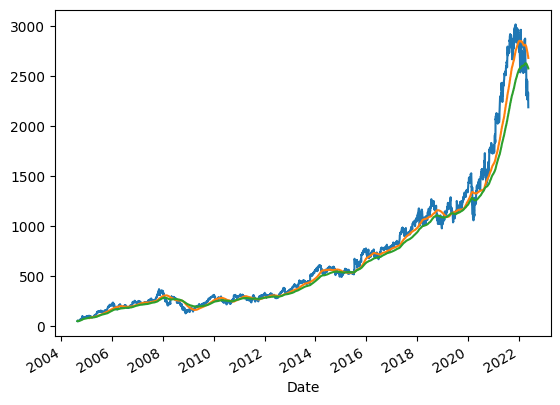

In [67]:
google['Close'].plot()
google['Close'].rolling(120).mean().plot()
google['Close'].ewm(120).mean().plot()

In [77]:
temp = pd.DataFrame()
temp['Close'] = google['Close']
temp['roll'] = google['Close'].rolling(3).mean()
temp['ewm'] =  google['Close'].ewm(3).mean()
temp

,Close,roll,ewm
Date,,,
2004-08-19,49.982655,NaN,49.982655
2004-08-20,53.952770,NaN,52.251292
2004-08-23,54.495735,52.810387,53.221862
2004-08-24,52.239197,53.562567,52.862487
2004-08-25,52.802086,53.179006,52.842689
2004-08-26,53.753517,52.931600,53.119697
2004-08-27,52.876804,53.144136,53.049620
2004-08-30,50.814533,52.481618,52.428684
2004-08-31,50.993862,51.561733,52.040859


<Axes: xlabel='Date'>

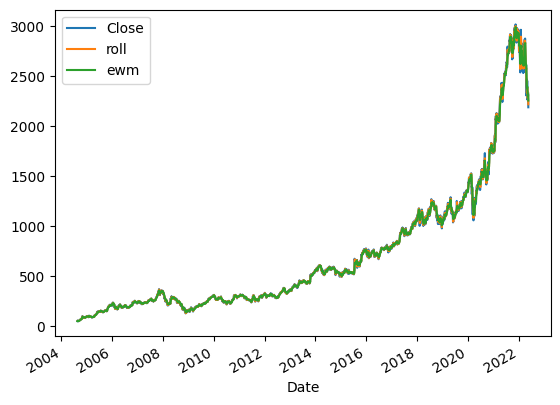

In [78]:
temp.plot()